In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
train.sample(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
9656,45797665,12083,862,HYUNDAI,H1,2011,Jeep,Yes,Diesel,2.5,43224 km,4,Automatic,Front,4-May,Left wheel,Blue,4
9885,45768138,251,1750,TOYOTA,Highlander,2008,Jeep,Yes,Hybrid,3.3,318467 km,6,Automatic,4x4,4-May,Left wheel,Blue,12
18829,45647811,1019,917,BMW,X5,2013,Jeep,Yes,Diesel,3,137802 km,6,Automatic,4x4,4-May,Left wheel,Black,0
18520,45758982,24462,-,CHEVROLET,Volt Full Packet,2012,Sedan,Yes,Plug-in Hybrid,1.4,113600 km,4,Variator,Front,4-May,Left wheel,Black,12
2759,45651273,5018,779,TOYOTA,Camry,2013,Sedan,Yes,Hybrid,2.5,190549 km,4,Automatic,Front,4-May,Left wheel,Black,12
13049,42786153,14897,878,TOYOTA,Prius,2009,Hatchback,No,Hybrid,1.8,162024 km,4,Automatic,Front,4-May,Left wheel,Red,8
609,45810285,308906,1694,PORSCHE,911,2016,Coupe,Yes,Petrol,4,8690 km,6,Automatic,Rear,2-Mar,Left wheel,Black,12
11663,45661148,1725,1363,MERCEDES-BENZ,ML 350,2012,Jeep,Yes,Diesel,4.6,180659 km,8,Automatic,4x4,4-May,Left wheel,Black,12
13881,45280588,18189,308,TOYOTA,Prius C,2014,Sedan,Yes,Hybrid,1.8,112000 km,4,Tiptronic,Front,4-May,Left wheel,Orange,12
17792,45804991,43626,770,HYUNDAI,Tucson,2016,Jeep,Yes,Diesel,1.7,122856 km,4,Automatic,Front,4-May,Left wheel,Black,4


In [65]:
test.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [67]:
train.sort_values(by='Price').head(8200).tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
13530,45688750,10976,-,TOYOTA,Prius,2008,Sedan,No,Hybrid,1.5,219200 km,4,Variator,Front,4-May,Left wheel,White,6
17408,45776817,10976,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4,Manual,Front,4-May,Left wheel,White,2
19092,45490926,10976,-,NISSAN,X-Trail,2004,Jeep,Yes,Petrol,2,121856 km,4,Automatic,4x4,4-May,Right-hand drive,Beige,6
7442,45788264,10976,-,HONDA,FIT,2008,Hatchback,No,Petrol,1.5,278000 km,4,Variator,Front,4-May,Right-hand drive,Blue,0
12680,45811321,10976,-,KIA,Picanto,2016,Hatchback,No,Petrol,1.2,140000 km,4,Manual,Front,4-May,Left wheel,Silver,2


<AxesSubplot:xlabel='Price'>

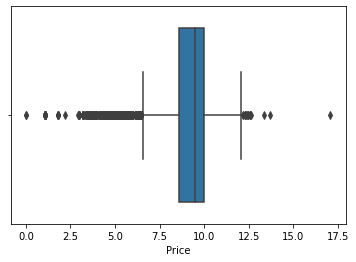

In [68]:
sns.boxplot(np.log(train.Price))

In [69]:
train['logPrice'] = np.log(train.Price)

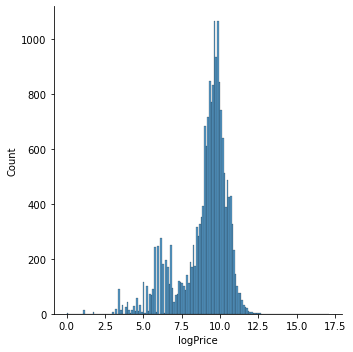

In [70]:
sns.displot(train.logPrice)

<AxesSubplot:ylabel='Count'>

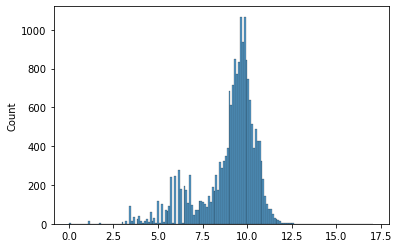

In [71]:
sns.histplot(boxcox(train.Price, 0))

In [72]:
boxcox(train.Price,2)

array([1.33882426e+09, 5.11999950e+06, 3.07327995e+07, ...,
       6.73264075e+07, 9.95883840e+07, 9.09226120e+07])

<AxesSubplot:>

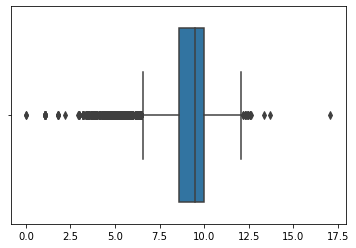

In [73]:
sns.boxplot(boxcox(train.Price, 0))

<AxesSubplot:xlabel='cPrice'>

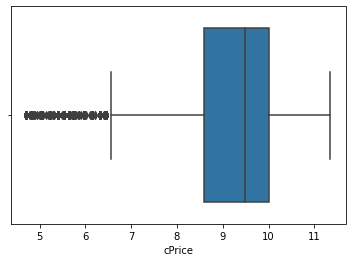

In [74]:
train['boxcoxPrice'] = boxcox(train.Price, 0)
lw = np.quantile(train.boxcoxPrice, 0.02)
hg = np.quantile(train.boxcoxPrice, 0.99)
train['cPrice'] = train.boxcoxPrice
train.loc[train.boxcoxPrice < lw, 'cPrice'] = lw
train.loc[train.boxcoxPrice > hg, 'cPrice'] = hg
sns.boxplot(train.cPrice)

In [75]:
train[['Price', 'cPrice']].head()

,Price,cPrice
0,51746,10.854102
1,3200,8.070906
2,7840,8.966994
3,5331,8.581294
4,1300,7.170120


<AxesSubplot:xlabel='cPrice', ylabel='Count'>

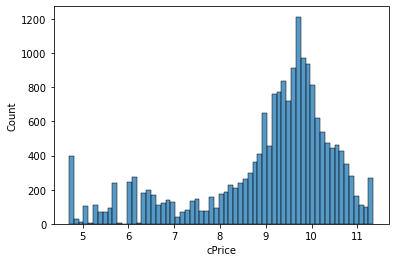

In [76]:
sns.histplot(train.cPrice)

In [77]:
lowPrice = np.quantile(train.logPrice, 0.02)
highPrice = np.quantile(train.logPrice, 0.99)
print (lowPrice, highPrice)

4.700480365792417 11.346575677685973


<AxesSubplot:xlabel='cappedLogPrice', ylabel='Count'>

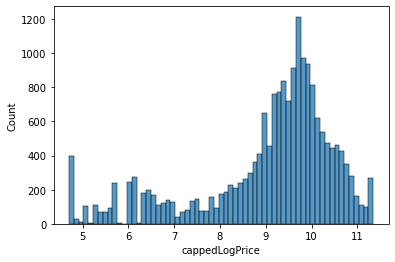

In [78]:
train['cappedLogPrice'] = train.logPrice
train.loc[train.logPrice < lowPrice, 'cappedLogPrice'] = lowPrice
train.loc[train.logPrice > highPrice, 'cappedLogPrice'] = highPrice
sns.histplot(train.cappedLogPrice)

<AxesSubplot:xlabel='cappedLogPrice'>

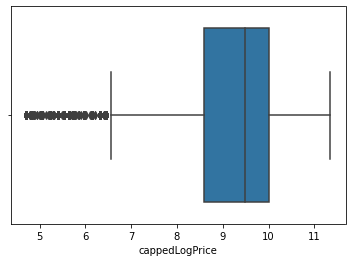

In [79]:
sns.boxplot(train.cappedLogPrice)

In [80]:
train.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'logPrice', 'boxcoxPrice', 'cPrice', 'cappedLogPrice'],
      dtype='object')

In [81]:
df_train = train.drop(columns=['ID', 'Price', 'logPrice'])
df_train.columns.to_list()

['Levy',
 'Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags',
 'boxcoxPrice',
 'cPrice',
 'cappedLogPrice']

In [82]:
df_train.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,boxcoxPrice,cPrice,cappedLogPrice
0,-,GAZ,20,1953,Sedan,No,Petrol,2,0 km,4,Manual,Rear,4-May,Left wheel,Beige,0,10.854102,10.854102,10.854102
1,-,GAZ,20,1953,Jeep,No,Petrol,3.2,100000 km,4,Manual,4x4,2-Mar,Left wheel,Green,0,8.070906,8.070906,8.070906
2,-,GAZ,21,1964,Sedan,No,Petrol,2.4,0 km,4,Manual,Rear,4-May,Left wheel,Sky blue,0,8.966994,8.966994,8.966994
3,-,GAZ,24,1990,Universal,Yes,Petrol,6.3,2000 km,8,Manual,4x4,2-Mar,Left wheel,Green,0,8.581294,8.581294,8.581294
4,-,AUDI,50,2018,Coupe,Yes,Petrol,0.5,4000 km,1,Tiptronic,Rear,>5,Right-hand drive,Blue,0,7.170120,7.170120,7.170120


In [83]:
pd.Series(train['Model'].apply(lambda x: x.split(' ')[0])).value_counts().head(25)

Prius         1256
Sonata        1107
Camry         1015
Elantra        964
E              850
Santa          537
FIT            468
H1             440
Tucson         437
X5             386
GX             373
Aqua           347
Cruze          333
Fusion         321
RX             313
C              278
ML             270
Transit        258
Optima         248
Jetta          231
Highlander     224
Civic          191
Actyon         188
Astra          184
RAV            179
Name: Model, dtype: int64

In [196]:
cat_cols = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type',
           'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'isLevied']
num_cols = ['Levy', 'Prod. year', 'Engine volume', 
            'fixedMileage', 'Airbags', 'Cylinders', 'KMPerYear']
num_cols_test = ['Levy', 'Prod. year', 'Engine volume', 
            'Mileage', 'Airbags', 'Cylinders']
print (len(df_train.columns.to_list()), 
        len(cat_cols),
        len(num_cols))

23 10 7


In [85]:
sorted(train.Doors.unique())

['2-Mar', '4-May', '>5']

<AxesSubplot:xlabel='Doors', ylabel='cPrice'>

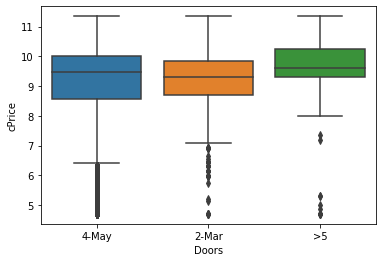

In [86]:
sns.boxplot(x='Doors', y='cPrice', data=train)

In [88]:
top_manufacturers = df_train.Manufacturer.value_counts().head(20).reset_index()['index'].to_list()

In [89]:
df_train.loc[df_train.Levy=='-', 'Levy'] = 0
df_train.Mileage = df_train.Mileage.apply(lambda x: int(x[:-3]))

In [92]:
df_train['Prod. year'].value_counts()

2012    2155
2014    2124
2013    1963
2011    1612
2015    1549
2010    1483
2016    1476
2017     959
2008     737
2009     601
2018     500
2007     464
2005     402
2003     367
2004     364
2006     317
2019     306
2002     296
2000     279
2001     254
1998     213
1999     207
1997     151
1996     114
1995     105
2020      47
1994      42
1992      30
1993      23
1990      18
1988      12
1991      10
1989       6
1986       6
1984       5
1985       5
1987       5
1953       4
1983       3
1939       3
1974       2
1965       2
1980       2
1964       2
1978       2
1977       2
1947       1
1981       1
1976       1
1943       1
1982       1
1957       1
1973       1
1968       1
Name: Prod. year, dtype: int64

In [91]:
df_train.Mileage.value_counts().head()

0         721
200000    183
150000    161
160000    120
100000    119
Name: Mileage, dtype: int64

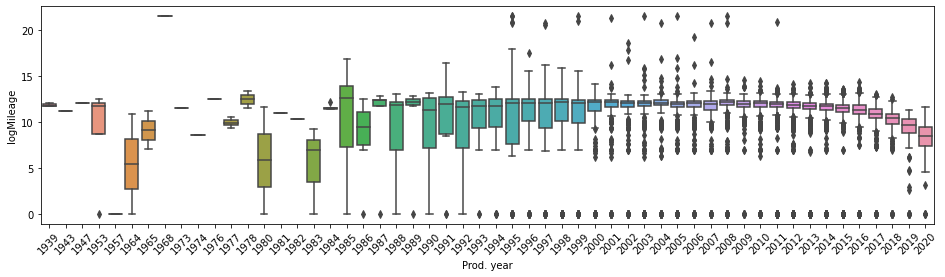

In [157]:
plt.figure(figsize=(16,4))
df_train['logMileage'] = np.log(df_train.Mileage+1)
sns.boxplot(x='Prod. year', y='logMileage', data=df_train)
plt.xticks(rotation=45)
plt.show()

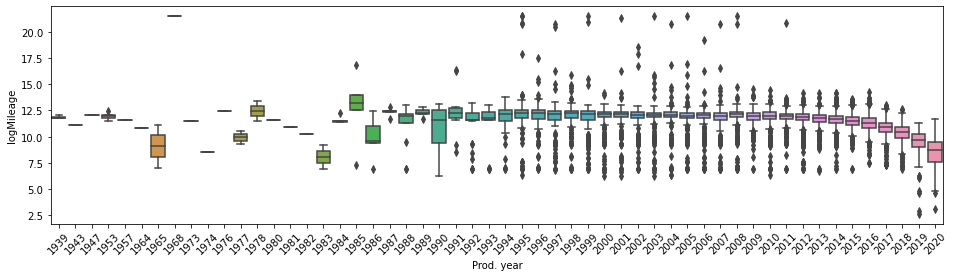

In [161]:
df_train.loc[df_train.logMileage==0, 'logMileage'] = None
df_train['logMileage'] = df_train['logMileage'].\
                        fillna(df_train.groupby('Prod. year')['logMileage'].transform('median'))
df_train.logMileage.fillna(np.mean(df_train.logMileage), inplace=True)
plt.figure(figsize=(16,4))
sns.boxplot(x='Prod. year', y='logMileage', data=df_train)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='fixedMileage'>

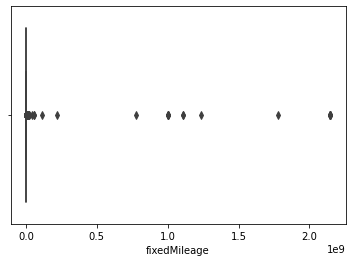

In [162]:
df_train['fixedMileage'] = np.exp(df_train.logMileage)
sns.boxplot(df_train.fixedMileage)

In [164]:
df_train.fixedMileage.value_counts().head()

200001.0    215
150001.0    205
180001.0    196
160001.0    171
120001.0    169
Name: fixedMileage, dtype: int64

In [165]:
df_train['KMPerYear'] = df_train.fixedMileage / (2021 - df_train['Prod. year'])

In [166]:
df_train['isLevied'] = 1
df_train.Levy = df_train.Levy.astype(int)
df_train.loc[df_train.Levy==0, 'isLevied'] = 0

In [167]:
df_train[num_cols].head()

,Levy,Prod. year,Engine volume,fixedMileage,Airbags,Cylinders,KMPerYear
0,0,1953,2,150001.0,0,4,2205.897059
1,0,1953,3.2,100001.0,0,4,1470.602941
2,0,1964,2.4,50001.0,0,4,877.210526
3,0,1990,6.3,2001.0,0,8,64.548387
4,0,2018,0.5,4001.0,0,1,1333.666667


In [168]:
df_train[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Levy           19237 non-null  int32  
 1   Prod. year     19237 non-null  int64  
 2   Engine volume  19237 non-null  object 
 3   fixedMileage   19237 non-null  float64
 4   Airbags        19237 non-null  int64  
 5   Cylinders      19237 non-null  int64  
 6   KMPerYear      19237 non-null  float64
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 977.0+ KB


In [169]:
df_train['Engine volume'] = df_train['Engine volume'].apply(lambda x: float(x.split(' ')[0]))
df_train['Engine volume'] = df_train['Engine volume'].astype(float)

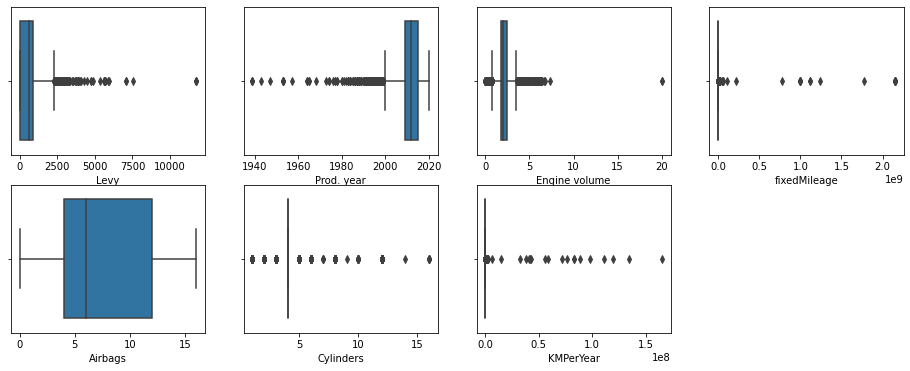

In [170]:
plt.figure(figsize=(16, 6))
for col in num_cols:
    plt.subplot(2, 4, num_cols.index(col)+1)
    sns.boxplot(df_train[col])

<AxesSubplot:xlabel='Prod. year'>

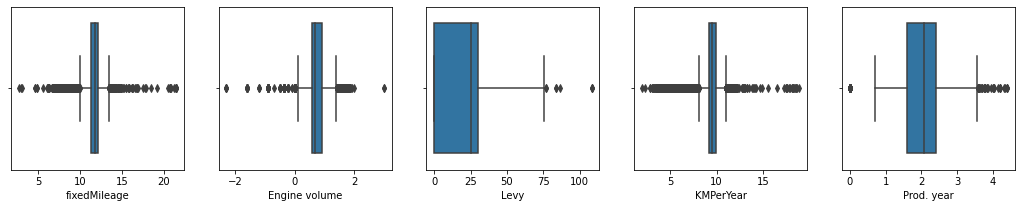

In [173]:
plt.figure(figsize=(18, 3))
plt.subplot(151); sns.boxplot(np.log(df_train.fixedMileage))
plt.subplot(152); sns.boxplot(np.log(df_train['Engine volume']))
plt.subplot(153); sns.boxplot(np.sqrt(df_train.Levy))
plt.subplot(154); sns.boxplot(np.log(df_train.KMPerYear))
plt.subplot(155); sns.boxplot(np.log(2020-df_train['Prod. year']))

<AxesSubplot:xlabel='Prod. year'>

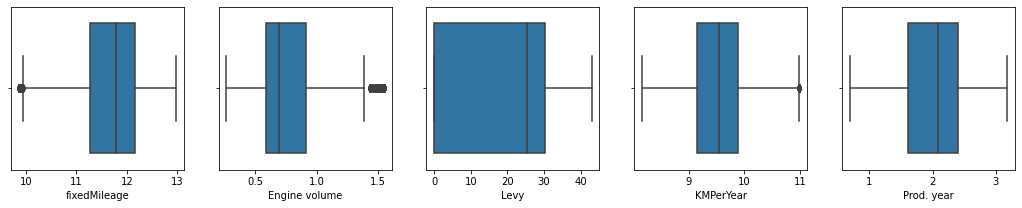

In [175]:
df_num_boxed = df_train[num_cols].copy()

df_num_boxed.fixedMileage = np.log(df_num_boxed.fixedMileage)
df_num_boxed.KMPerYear = np.log(df_num_boxed.KMPerYear)
df_num_boxed['Engine volume'] = np.log(df_num_boxed['Engine volume'])
df_num_boxed.Levy = np.sqrt(df_num_boxed.Levy)
df_num_boxed['Prod. year'] = np.log(2020-df_train['Prod. year'])

lw_mileage = np.quantile(df_num_boxed.fixedMileage, 0.05)
hg_mileage = np.quantile(df_num_boxed.fixedMileage, 0.98)
df_num_boxed.loc[df_num_boxed.fixedMileage<lw_mileage, 'fixedMileage'] = lw_mileage
df_num_boxed.loc[df_num_boxed.fixedMileage>hg_mileage, 'fixedMileage'] = hg_mileage

lw_kmpy = np.quantile(df_num_boxed.KMPerYear, 0.05)
hg_kmpy = np.quantile(df_num_boxed.KMPerYear, 0.98)
df_num_boxed.loc[df_num_boxed.KMPerYear<lw_kmpy, 'KMPerYear'] = lw_kmpy
df_num_boxed.loc[df_num_boxed.KMPerYear>hg_kmpy, 'KMPerYear'] = hg_kmpy

lw_enging = np.quantile(df_num_boxed['Engine volume'], 0.02)
hg_enging = np.quantile(df_num_boxed['Engine volume'], 0.98)
df_num_boxed.loc[df_num_boxed['Engine volume']<lw_enging, 'Engine volume'] = lw_enging
df_num_boxed.loc[df_num_boxed['Engine volume']>hg_enging, 'Engine volume'] = hg_enging

hg_levy = np.quantile(df_num_boxed.Levy, 0.98)
df_num_boxed.loc[df_num_boxed.Levy>hg_levy, 'Levy'] = hg_levy

lw_year = np.quantile(df_num_boxed['Prod. year'], 0.02)
hg_year = np.quantile(df_num_boxed['Prod. year'], 0.98)
df_num_boxed.loc[df_num_boxed['Prod. year']<lw_year, 'Prod. year'] = lw_year
df_num_boxed.loc[df_num_boxed['Prod. year']>hg_year, 'Prod. year'] = hg_year

plt.figure(figsize=(18, 3))
plt.subplot(151); sns.boxplot(df_num_boxed.fixedMileage)
plt.subplot(152); sns.boxplot(df_num_boxed['Engine volume'])
plt.subplot(153); sns.boxplot(df_num_boxed.Levy)
plt.subplot(154); sns.boxplot(df_num_boxed.KMPerYear)
plt.subplot(155); sns.boxplot(df_num_boxed['Prod. year'])

In [176]:
df_train.loc[~df_train.Manufacturer.isin(top_manufacturers), 'Manufacturer'] = 'Other'
for col in cat_cols:
    print (col, ': ', len(df_train[col].unique()))

Manufacturer :  21
Category :  11
Leather interior :  2
Fuel type :  7
Gear box type :  4
Drive wheels :  3
Doors :  3
Wheel :  2
Color :  16
isLevied :  2


In [177]:
df_dummies = pd.get_dummies(df_train[cat_cols], drop_first=True)
df_dummies.tail()

,isLevied,Manufacturer_BMW,Manufacturer_CHEVROLET,Manufacturer_DAEWOO,Manufacturer_DODGE,Manufacturer_FORD,Manufacturer_HONDA,Manufacturer_HYUNDAI,Manufacturer_JEEP,Manufacturer_KIA,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
19232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19233,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19234,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
19236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Modelling

In [178]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [253]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X = pd.concat([df_train[num_cols], df_dummies], axis=1)
X = pd.concat([df_num_boxed, df_dummies], axis=1)
y = df_train.cappedLogPrice
X_cols = X.columns.to_list()

kmeans = KMeans(n_clusters=1, max_iter=50)
kmeans.fit(pd.DataFrame(y))
pd.Series(kmeans.labels_).value_counts()
X_clustered = X.copy()
X['cluster_id'] = kmeans.labels_

#y = train.cPrice

X_train, X_test, y_train, y_test = train_test_split(X[X_cols], y, test_size = 0.2, 
                                                    random_state = 42, stratify=X.cluster_id)
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_cols)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test), columns=X_cols)

<AxesSubplot:xlabel='cluster_id', ylabel='cappedLogPrice'>

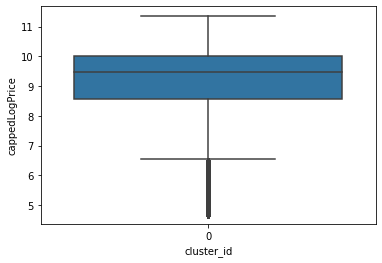

In [254]:
sns.boxplot(x='cluster_id', y='cappedLogPrice', data=pd.concat([X, y], axis=1))

# Random Forest

In [255]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(oob_score=True, random_state=42).fit(X_train_scaled, y_train)
rf_model.score(X_test_scaled, y_test)                              

0.6668148260582525

In [256]:
rf_model_1 = RandomForestRegressor(oob_score=True, random_state=42).fit(X_train, y_train)
rf_model_1.score(X_test, y_test)

0.6664860380312214

In [257]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(
        np.exp(y_test), 
        np.exp(rf_model.predict(X_test_scaled))))

0.8786657736365617

In [258]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(
        np.exp(y_test), 
        np.exp(rf_model_1.predict(X_test))))

0.8790974771302486

In [72]:
df_importance = pd.DataFrame(rf_model.feature_importances_, columns = ['Importance'])
df_importance['Feature'] = X_cols
df_importance = df_importance[['Feature', 'Importance']].sort_values(by='Importance', ascending=False)
df_importance.head(15)


,Feature,Importance
4,Airbags,0.170840
1,Prod. year,0.108511
3,Mileage,0.107698
6,KMPerYear,0.100433
46,Gear box type_Tiptronic,0.099475
0,Levy,0.075421
2,Engine volume,0.050641
38,Leather interior_Yes,0.031706
40,Fuel type_Hybrid,0.022375
31,Category_Jeep,0.016503


---


# Linear Regression

In [186]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression().fit(X_train_scaled, y_train)
lin_model.score(X_test_scaled, y_test)

-2.783491091872863e+21

In [187]:
import xgboost as xg
xgb_r = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb_r.fit(X_train_scaled, y_train)
pred = np.exp(xgb_r.predict(X_test_scaled))

np.sqrt(mean_squared_log_error(np.exp(y_test), pred))


0.8593444686570848

---

# Ensemble

In [255]:
X_train_scaled.head()

,Levy,Prod. year,Engine volume,Mileage,Airbags,Cylinders,KMPerYear,isLevied,Manufacturer_BMW,Manufacturer_CHEVROLET,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,1.066791,0.454267,0.989417,0.376073,-1.521507,1.166456,0.166963,0.659955,-0.243144,-0.244639,...,-0.130064,-0.374292,-0.115906,-0.036074,-0.044928,-0.186076,-0.495244,-0.080056,1.812248,-0.075837
1,1.121716,-0.425966,-1.164553,0.213036,-1.521507,-0.489197,0.418253,0.659955,-0.243144,-0.244639,...,-0.130064,-0.374292,-0.115906,-0.036074,-0.044928,-0.186076,2.019208,-0.080056,-0.551801,-0.075837
2,0.225197,0.272715,-1.378950,0.098056,0.328671,-0.489197,-0.047031,0.659955,-0.243144,4.087647,...,-0.130064,-0.374292,-0.115906,-0.036074,-0.044928,-0.186076,2.019208,-0.080056,-0.551801,-0.075837
3,0.149509,-0.425966,-1.378950,-0.449101,1.253760,-0.489197,-0.307333,0.659955,-0.243144,-0.244639,...,-0.130064,-0.374292,-0.115906,-0.036074,-0.044928,-0.186076,-0.495244,-0.080056,1.812248,-0.075837
4,-1.379090,0.272715,-0.270575,-0.237599,-1.521507,-0.489197,-0.414850,-1.515254,-0.243144,-0.244639,...,-0.130064,-0.374292,-0.115906,-0.036074,-0.044928,-0.186076,2.019208,-0.080056,-0.551801,-0.075837


In [188]:
from sklearn.ensemble import VotingRegressor

model1 = RandomForestRegressor(max_depth=17, n_estimators=1000, random_state=42, oob_score=True)
model2 = xg.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

er = VotingRegressor([('RandomForest', model1), 
                       ('XGBoost', model2)])
er.fit(X_train_scaled, y_train)
print (er.score(X_test_scaled, y_test))

0.6954837691779214


In [189]:
np.sqrt(mean_squared_log_error(
            np.exp(y_test), 
            np.exp(er.predict(X_test_scaled))))

0.8339222825611179

---

In [193]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, BaggingRegressor
algo_list = [AdaBoostRegressor(), ExtraTreesRegressor(), HistGradientBoostingRegressor(), BaggingRegressor()]
for f in algo_list:
    en_model = f.fit(X_train_scaled, y_train)
    print (en_model.score(X_test_scaled, y_test))

0.2985172845392151
0.676173852041999
0.6357221523532298
0.6571604916766915


# Tuning Random Forest

In [225]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_algo = RandomForestRegressor()
# fit tree on training data
rf_search = GridSearchCV(rf_algo, parameters, 
                    cv=n_folds,#) 
                   scoring="r2")
rf_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='r2')

In [226]:
rf_search.best_estimator_

RandomForestRegressor(max_depth=17)

In [227]:
rf_search.best_estimator_.score(X_test_scaled, y_test)

0.6786632061553433

In [246]:
parameters = {'n_estimators': range(100, 1000, 200)}
# instantiate the model
rf_algo = RandomForestRegressor(max_depth=17, n_jobs=-1)
# fit tree on training data
rf_search = GridSearchCV(rf_algo, parameters, 
                    cv=n_folds,#) 
                   scoring="r2")
rf_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=17, n_jobs=-1),
             param_grid={'n_estimators': range(100, 1000, 200)},
             scoring='neg_root_mean_squared_error')

In [228]:
rf_search.best_estimator_

RandomForestRegressor(max_depth=17)

---

In [194]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [134]:
?LeakyReLU

In [96]:
X.shape

(19237, 68)

In [196]:
model = Sequential()
model.add(Dense(68, input_dim=68, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 68)                4692      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                2070      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 6,793
Trainable params: 6,793
Non-trainable params: 0
_________________________________________________________________


In [211]:
?model.compile

In [221]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=200, verbose=0, validation_split=0.25)
predictions = model.predict(X_test_scaled)

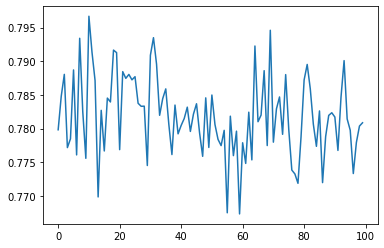

In [222]:
plt.plot(np.sqrt(np.array(history.history['mean_squared_error'])))

In [223]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(predictions)))

88851.64003488126

In [224]:
r2_score(np.exp(y_test), np.exp(predictions))

-29.857409989696965

---

In [213]:
df_pycaret = pd.concat([X, y], axis=1)

In [190]:
import pycaret

In [191]:
pycaret

<module 'pycaret' from 'D:\\Anaconda3\\lib\\site-packages\\pycaret\\__init__.py'>

In [192]:
clf1 = pycaret.regression.setup(data = df_pycaret,
             target = 'cappedLogPrice',
             numeric_imputation = 'mean',
             #categorical_features = cat_cols, 
             #ignore_features = ['Name','Ticket','Cabin'],
             normalize = True,
             verbose=True,
             silent = False)

AttributeError: module 'pycaret' has no attribute 'regression'

In [423]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4693,0.7874,0.8860,0.6615,0.1048,0.0626,5.6450
et,Extra Trees Regressor,0.4592,0.8770,0.9351,0.6228,0.1100,0.0607,6.6260
xgboost,Extreme Gradient Boosting,0.5715,0.8941,0.9443,0.6156,0.1112,0.0757,2.5120
catboost,CatBoost Regressor,0.5934,0.9140,0.9550,0.6069,0.1134,0.0796,5.6680
lightgbm,Light Gradient Boosting Machine,0.5956,0.9262,0.9612,0.6019,0.1143,0.0801,0.1660
gbr,Gradient Boosting Regressor,0.7232,1.2051,1.0968,0.4816,0.1298,0.0975,1.5300
knn,K Neighbors Regressor,0.6789,1.3016,1.1401,0.4394,0.1308,0.0875,0.3950
dt,Decision Tree Regressor,0.5746,1.4893,1.2188,0.3582,0.1456,0.0741,0.1240
br,Bayesian Ridge,0.8814,1.5500,1.2444,0.3327,0.1452,0.1170,0.0830
ridge,Ridge Regression,0.8820,1.5512,1.2449,0.3322,0.1452,0.1170,0.0450


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2614, verbose=0, warm_start=False)

In [218]:
?pycaret.regression.tune_model

Object `pycaret.regression.tune_model` not found.


In [215]:
rf = pycaret.regression.create_model('rf')
tuned_rf = pycaret.regression.tune_model(rf)

AttributeError: module 'pycaret' has no attribute 'regression'

In [ ]:
pycaret.regression.predict_model(tuned_rf)

---

In [221]:
df_test.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,isLevied
0,0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0.000000,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,0
1,0,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,10.165890,4,Tiptronic,Front,4-May,Left wheel,Grey,10,NaN,0
2,0,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,12.031725,4,Automatic,Front,4-May,Right-hand drive,Sky blue,8,NaN,0
3,975,Other,XC90,2012,Jeep,Yes,Petrol,3.2,11.870607,6,Automatic,4x4,4-May,Left wheel,Blue,12,NaN,1
4,0,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,12.206078,4,Manual,Front,4-May,Left wheel,Black,0,NaN,0


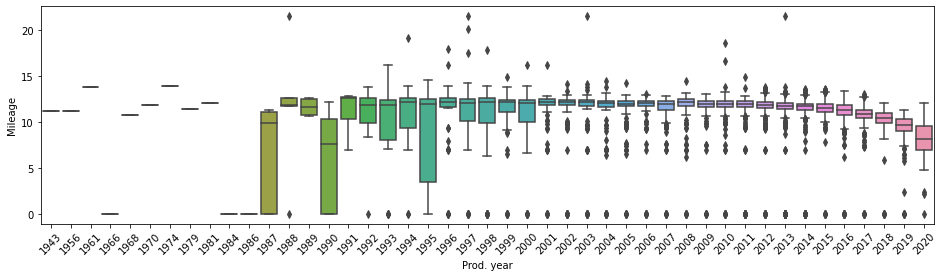

In [276]:
plt.figure(figsize=(16, 4))
sns.boxplot(y='Mileage', x='Prod. year', data=df_test)
plt.xticks(rotation=45)
plt.show()

In [278]:
df_test = test.drop(columns = 'ID')

df_test.loc[df_test.Levy=='-', 'Levy'] = 0
df_test.loc[df_test.Doors=='04-May', 'Doors'] = '4-May'
df_test.loc[df_test.Doors=='02-Mar', 'Doors'] = '2-May'
df_test.Mileage = df_test.Mileage.apply(lambda x: int(x[:-3]))
df_test.Mileage = np.log(df_test.Mileage+1)
df_test['Engine volume'].apply(lambda x: float(x.split(' ')[0]))
df_test['Engine volume'] = df_test['Engine volume'].apply(lambda x: float(x.split(' ')[0]))

df_test.Levy = df_test.Levy.astype(int)
df_test['isLevied'] = 1
df_test.Levy = df_test.Levy.astype(int)
df_test.loc[df_test.Levy==0, 'isLevied'] = 0
df_test.loc[df_test.Cylinders > 15, 'Cylinders'] = 15
df_test['Engine volume'] = df_test['Engine volume'].astype(float)

df_test.loc[~df_test.Manufacturer.isin(top_manufacturers), 'Manufacturer'] = 'Other'
df_dummies_test = pd.get_dummies(df_test[cat_cols], drop_first=True)

#############################################

df_num_boxed_test = df_test[num_cols_test].copy()

df_num_boxed_test['logMileage'] = np.log(df_num_boxed_test.Mileage+1)
df_num_boxed_test.loc[df_num_boxed_test.logMileage==0, 'logMileage'] = None
df_num_boxed_test['logMileage'] = df_num_boxed_test['logMileage'].\
                        fillna(df_num_boxed_test.groupby('Prod. year')['logMileage'].transform('median'))
df_num_boxed_test.logMileage.fillna(np.mean(df_num_boxed_test.logMileage), inplace=True)
df_num_boxed_test['fixedMileage'] = np.exp(df_num_boxed_test.logMileage)
df_num_boxed_test['KMPerYear'] = df_num_boxed_test.fixedMileage / (2021 - df_num_boxed_test['Prod. year'])


df_num_boxed_test['fixedMileage'] = np.log(df_num_boxed_test.fixedMileage)
df_num_boxed_test.KMPerYear = np.log(df_num_boxed_test.KMPerYear)
df_num_boxed_test['Engine volume'] = np.log(df_num_boxed_test['Engine volume'])
df_num_boxed_test.Levy = np.sqrt(df_num_boxed_test.Levy)
df_num_boxed_test['Prod. year'] = np.log(2020-df_test['Prod. year'])

lw_mileage = np.quantile(df_num_boxed_test.fixedMileage, 0.05)
hg_mileage = np.quantile(df_num_boxed_test.fixedMileage, 0.98)
#df_num_boxed_test.loc[df_num_boxed_test.Mileage<lw_mileage, 'fixedMileage'] = lw_mileage
#df_num_boxed_test.loc[df_num_boxed_test.Mileage>hg_mileage, 'fixedMileage'] = hg_mileage

lw_kmpy = np.quantile(df_num_boxed_test.KMPerYear, 0.05)
hg_kmpy = np.quantile(df_num_boxed_test.KMPerYear, 0.98)
df_num_boxed_test.loc[df_num_boxed_test.KMPerYear<lw_kmpy, 'KMPerYear'] = lw_kmpy
df_num_boxed_test.loc[df_num_boxed_test.KMPerYear>hg_kmpy, 'KMPerYear'] = hg_kmpy

lw_enging = np.quantile(df_num_boxed_test['Engine volume'], 0.02)
hg_enging = np.quantile(df_num_boxed_test['Engine volume'], 0.98)
df_num_boxed_test.loc[df_num_boxed_test['Engine volume']<lw_enging, 'Engine volume'] = lw_enging
df_num_boxed_test.loc[df_num_boxed_test['Engine volume']>hg_enging, 'Engine volume'] = hg_enging

hg_levy = np.quantile(df_num_boxed_test.Levy, 0.98)
df_num_boxed_test.loc[df_num_boxed_test.Levy>hg_levy, 'Levy'] = hg_levy

lw_year = np.quantile(df_num_boxed_test['Prod. year'], 0.02)
hg_year = np.quantile(df_num_boxed_test['Prod. year'], 0.98)
df_num_boxed_test.loc[df_num_boxed_test['Prod. year']<lw_year, 'Prod. year'] = lw_year
df_num_boxed_test.loc[df_num_boxed_test['Prod. year']>hg_year, 'Prod. year'] = hg_year

X_submit = pd.concat([df_num_boxed_test[num_cols], df_dummies_test], axis=1)
X_submit_scaled = pd.DataFrame(scaler.transform(X_submit), columns=X_cols)
X_submit_scaled.head()

,Levy,Prod. year,Engine volume,fixedMileage,Airbags,Cylinders,KMPerYear,isLevied,Manufacturer_BMW,Manufacturer_CHEVROLET,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,-1.436575,0.073255,-0.276372,-12.296204,0.793460,-0.487931,-14.727578,-1.526510,-0.240434,-0.241943,...,-0.131861,2.662885,-0.114749,-0.038689,-0.045648,-0.184387,-0.494226,-0.078814,-0.552001,-0.075402
1,-1.436575,0.073255,0.294579,-12.488878,0.793460,-0.487931,-14.957128,-1.526510,-0.240434,-0.241943,...,-0.131861,2.662885,-0.114749,-0.038689,-0.045648,-0.184387,-0.494226,-0.078814,-0.552001,-0.075402
2,-1.436575,1.158001,-1.177266,-12.280129,0.329498,-0.487931,-15.634462,-1.526510,-0.240434,-0.241943,...,-0.131861,-0.375533,-0.114749,-0.038689,-0.045648,-0.184387,-0.494226,12.688163,-0.552001,-0.075402
3,0.753857,0.073255,1.195472,-12.296936,1.257423,1.171283,-14.728449,0.655089,-0.240434,-0.241943,...,-0.131861,-0.375533,-0.114749,-0.038689,-0.045648,-0.184387,-0.494226,-0.078814,-0.552001,-0.075402
4,-1.436575,1.969054,-0.975159,-12.262175,-1.526352,-0.487931,-16.148803,-1.526510,-0.240434,-0.241943,...,-0.131861,-0.375533,-0.114749,-0.038689,-0.045648,-0.184387,-0.494226,-0.078814,-0.552001,-0.075402


<AxesSubplot:xlabel='fixedMileage'>

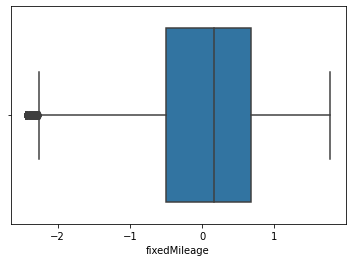

In [279]:
sns.boxplot(X_train_scaled.fixedMileage)

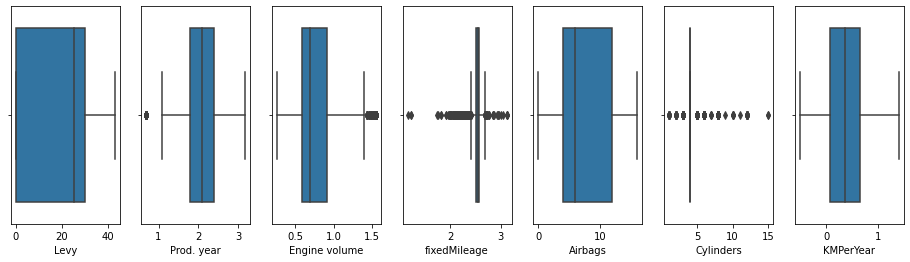

In [280]:
plt.figure(figsize=(16,4))
for col in num_cols:
    plt.subplot(1, len(num_cols), num_cols.index(col)+1)
    sns.boxplot(df_num_boxed_test[col])

<AxesSubplot:xlabel='fixedMileage'>

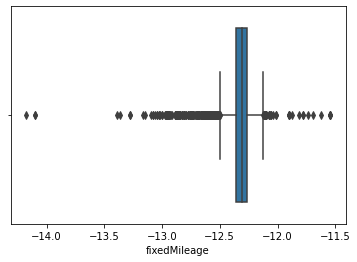

In [281]:
sns.boxplot(X_submit_scaled.fixedMileage)

In [235]:
df_num_boxed_test[num_cols].head()

,Levy,Prod. year,Engine volume,fixedMileage,Airbags,Cylinders,KMPerYear
0,0.00000,2.079442,0.693147,2.555487,10,4,0.358263
1,0.00000,2.079442,0.875469,2.412864,10,4,0.215639
2,0.00000,2.708050,0.405465,2.567387,8,4,-0.205202
3,31.22499,2.079442,1.163151,2.554946,12,6,0.357722
4,0.00000,3.178054,0.470004,2.580677,0,4,-0.524772


In [238]:
y_submit = pd.DataFrame(np.round(np.exp(rf_model.predict(X_submit_scaled)), 2) , columns=['Price'])
y_submit.to_csv('submission.csv', index=False)

In [206]:
y_submit = pd.DataFrame(np.round(np.exp(model.predict(X_submit_scaled)), 2) , columns=['Price'])
y_submit.to_csv('submission.csv', index=False)

In [236]:
y_submit = pd.DataFrame(np.round(np.exp(er.predict(X_submit_scaled)), 2) , columns=['Price'])
y_submit.to_csv('submission.csv', index=False)